## Datos anteriores

In [14]:
import pandas as pd
import warnings
import matplotlib.ticker as ticker

warnings.filterwarnings("ignore")

url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"
url_zoop_pay = "https://gist.githubusercontent.com/ahcamachod/ce728231a836a973c0df94a9f03ed871/raw/8db6da43d7cd94fcab937208067d0fceb521b78c/zoop_pay.csv"

clientes = pd.read_csv(url_clientes)
ventas = pd.read_csv(url_ventas)
ventas["fecha"] = pd.to_datetime(ventas["fecha"], format="%Y-%m-%d")
ventas["horario"] = pd.to_datetime(ventas["horario"], format="%H:%M").dt.time

df = pd.merge(ventas, clientes, on="ID_compra", how="inner")
# Reorganizar las columnas en el orden deseado
columnas_ordenadas = [
    "ID_compra",
    "fecha",
    "horario",
    "categoria",
    "precio_unitario",
    "cantidad",
    "envio",
    "metodo_pago",
    "ID_cliente",
    "edad",
    "sexo_biologico",
    "ciudad",
    "estado",
    "region",
    "cashback",
    "nota",
]

# Aplicar el orden de las columnas
df = df[columnas_ordenadas]

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear la tabla resumen
metodos_de_pago = df["metodo_pago"].value_counts().reset_index()
metodos_de_pago.columns = ["metodo_pago", "cantidad"]

# 1. Crear una columna de facturaci√≥n total por compra
df["facturacion"] = df["precio_unitario"] * df["cantidad"] + df["envio"]

# 2. Agrupar por categor√≠a y sumar la facturaci√≥n
facturacion_categoria = df.groupby("categoria")["facturacion"].sum().sort_values()

# Asegurarse de que la columna 'fecha' es datetime
df["fecha"] = pd.to_datetime(df["fecha"])

# Crear columna con el mes como texto completo
df["mes_nombre"] = df["fecha"].dt.strftime("%B")  # e.g., 'January', 'February', etc.

# Crear columna con el n√∫mero del mes para ordenar correctamente
df["mes_numero"] = df["fecha"].dt.month

# Calcular la facturaci√≥n mensual
ventas_mensuales = (
    df.groupby(["mes_numero", "mes_nombre"])["facturacion"].sum().reset_index()
)

# Ordenar por n√∫mero de mes
ventas_mensuales = ventas_mensuales.sort_values("mes_numero")

# Diccionario de traducci√≥n de meses
meses = {
    "January": "Ene",
    "February": "Feb",
    "March": "Mar",
    "April": "Abr",
    "May": "May",
    "June": "Jun",
    "July": "Jul",
    "August": "Ago",
    "September": "Sep",
    "October": "Oct",
    "November": "Nov",
    "December": "Dic",
}

# Aplicar traducci√≥n
ventas_mensuales["mes"] = ventas_mensuales["mes_nombre"].map(meses)

# 2. Crear columna de trimestre (formato 'T1', 'T2', etc.)
df["trimestre"] = df["fecha"].dt.to_period("Q").astype(str).str.replace("2023Q", "T")

# 3. Agrupar por trimestre y m√©todo de pago, sumando facturaci√≥n
ventas_trimestre = (
    df.groupby(["trimestre", "metodo_pago"])["facturacion"].sum().unstack(fill_value=0)
)

# Filtrar solo las 3 categor√≠as deseadas
categorias_interes = ["Papeler√≠a y oficina", "Libros", "Alimentos y bebidas"]
df_filtrado = df[df["categoria"].isin(categorias_interes)]

# Agrupar por trimestre y categor√≠a, sumando la facturaci√≥n
ventas_categoria = (
    df_filtrado.groupby(["trimestre", "categoria"])["facturacion"]
    .sum()
    .unstack(fill_value=0)
)

# Adicionamos los colores al proyecto
ROJO_1, ROJO_2, ROJO_3 = "#e23155", "#cc2c4e", "#b32742"
AZUL_1, AZUL_2, AZUL_3 = "#203f75", "#1c3867", "#19325b"
BLANCO, GRIS_1, GRIS_2, GRIS_3, GRIS_4, GRIS_5 = (
    "#ffffff",
    "#ebebeb",
    "#d9d9d9",
    "#cccccc",
    "#555655",
    "#231f20",
)
AQUA_1, AQUA_2, AQUA_3 = "#addcd4", "#9fccc5", "#96bfb9"

# Generando funciones para los gr√°ficos

## Gr√°fico 1: M√©todos de pago m√°s utilizados en 2023

```python
metodos_de_pago = df["metodo_pago"].value_counts().reset_index()
metodos_de_pago.columns = ["metodo_pago", "cantidad"]

# 2. Calcular porcentaje
top_2 = metodos_de_pago["cantidad"][:2].sum()
total = metodos_de_pago["cantidad"].sum()
porcentaje = round((top_2 / total) * 100, 1)

# 3. Visualizaci√≥n
plt.figure(figsize=(10, 6), facecolor=GRIS_1)
ax = sns.barplot(data=metodos_de_pago, x="metodo_pago", y="cantidad", color=ROJO_1)

# Personalizaci√≥n del gr√°fico
ax.set_facecolor(GRIS_1)
ax.set_title("M√©todos de pago m√°s utilizados en 2023", fontsize=18, color=GRIS_5)

# Eje X
ax.set_xlabel("M√©todo de Pago", fontsize=12, color=AZUL_1)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, color=AZUL_1)

# Eje Y eliminado
ax.set_ylabel(None)
ax.set_yticks([])

# Quitar bordes
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

# A√±adir cantidades sobre las barras
for i, row in metodos_de_pago.iterrows():
    ax.text(
        i,
        row["cantidad"] + max(metodos_de_pago["cantidad"]) * 0.01,
        int(row["cantidad"]),
        ha="center",
        fontsize=12,
        color=AZUL_1,
    )

# A√±adir texto explicativo en el gr√°fico
texto = (
    f"$\\bf{porcentaje}$% de los clientes utilizan Tarjeta de Cr√©dito o Transferencia \n"
    "para el pago. Ser√≠a interesante considerar asociaciones con \n"
    "bancos para la creaci√≥n de un Zoop Pay con el fin de fidelizar \n"
    "a nuestra clientela."
)

ax.text(1.5, 2500, texto, fontsize=10, color=AZUL_3)

# plt.tight_layout()
plt.show()
```

In [15]:
def metodo_pago():
    metodos_de_pago = df["metodo_pago"].value_counts().reset_index()
    metodos_de_pago.columns = ["metodo_pago", "cantidad"]

    # 2. Calcular porcentaje
    top_2 = metodos_de_pago["cantidad"][:2].sum()
    total = metodos_de_pago["cantidad"].sum()
    porcentaje = round((top_2 / total) * 100, 1)

    # 3. Visualizaci√≥n
    plt.figure(figsize=(10, 6), facecolor=GRIS_1)
    ax = sns.barplot(data=metodos_de_pago, x="metodo_pago", y="cantidad", color=ROJO_1)

    # Personalizaci√≥n del gr√°fico
    ax.set_facecolor(GRIS_1)
    ax.set_title("M√©todos de pago m√°s utilizados en 2023", fontsize=18, color=GRIS_5)

    # Eje X
    ax.set_xlabel("M√©todo de Pago", fontsize=12, color=AZUL_1)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, color=AZUL_1)

    # Eje Y eliminado
    ax.set_ylabel(None)
    ax.set_yticks([])

    # Quitar bordes
    for spine in ["left", "top", "right"]:
        ax.spines[spine].set_visible(False)

    # A√±adir cantidades sobre las barras
    for i, row in metodos_de_pago.iterrows():
        ax.text(
            i,
            row["cantidad"] + max(metodos_de_pago["cantidad"]) * 0.01,
            int(row["cantidad"]),
            ha="center",
            fontsize=12,
            color=AZUL_1,
        )

    # A√±adir texto explicativo en el gr√°fico
    texto = (
        f"$\\bf{porcentaje}$% de los clientes utilizan Tarjeta de Cr√©dito o Transferencia \n"
        "para el pago. Ser√≠a interesante considerar asociaciones con \n"
        "bancos para la creaci√≥n de un Zoop Pay con el fin de fidelizar \n"
        "a nuestra clientela."
    )

    ax.text(1.5, 2500, texto, fontsize=10, color=AZUL_3)

    return plt

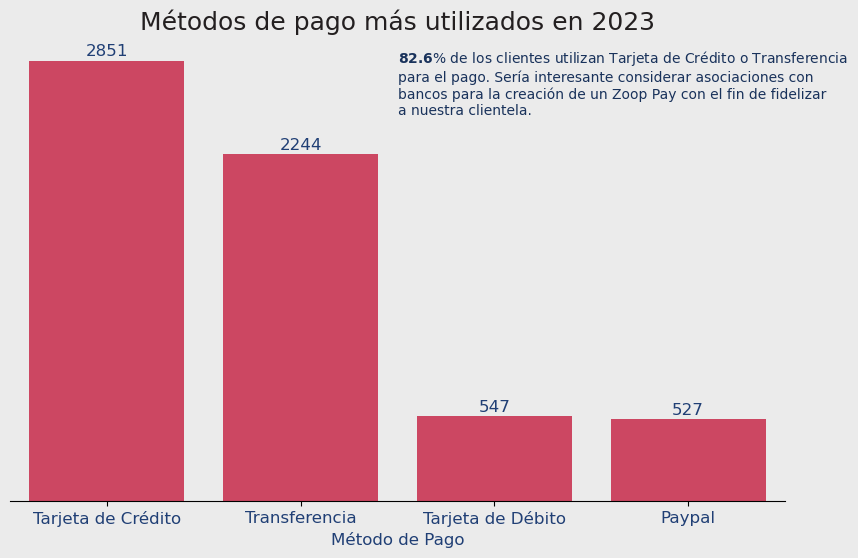

In [16]:
metodo_pago().show()

## Gr√°fico 2: Ventas totales mensuales del 2023

```python
# Preparar los datos
df["mes"] = df["fecha"].dt.strftime("%B")
ventas_mensuales = df.groupby("mes")["facturacion"].sum().reindex(meses.keys())
ventas_mensuales.index = [meses[m] for m in ventas_mensuales.index]

# Crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6), facecolor=GRIS_1)
ax.set_facecolor(GRIS_1)

# Graficar l√≠nea
ax.plot(
    ventas_mensuales.index,
    ventas_mensuales.values,
    marker="o",
    color=AZUL_1,
    linewidth=2,
)

# T√≠tulo
ax.set_title("Ventas totales mensuales en 2023", fontsize=18, color=GRIS_5)

# Ejes
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis="x", labelsize=12, labelcolor=AZUL_1)
ax.tick_params(axis="y", labelsize=12, labelcolor=AZUL_1)


# Formato del eje Y
def millones_mxn(x, _):
    return f"MXN$ {x/1e6:.2f} M"


ax.yaxis.set_major_formatter(ticker.FuncFormatter(millones_mxn))

# Quitar bordes derecho y superior
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# Encontrar los 4 puntos m√°s altos
top_ventas = ventas_mensuales.sort_values(ascending=False).head(4)
for i, (mes, valor) in enumerate(top_ventas.items(), 1):
    idx = list(ventas_mensuales.index).index(mes)

    # Dibujar c√≠rculo con scatter
    ax.scatter(idx, valor, s=200, facecolors="none", edgecolors=ROJO_1, linewidth=2)

    # Agregar n√∫mero a la izquierda
    ax.text(idx - 0.6, valor, str(i), fontsize=12, color=ROJO_1, va="center")

# plt.tight_layout()
plt.show()

```

In [ ]:
def ventas_mensuales():
    # Preparar los datos
    df["mes"] = df["fecha"].dt.strftime("%B")
    ventas_mensuales = df.groupby("mes")["facturacion"].sum().reindex(meses.keys())
    ventas_mensuales.index = [meses[m] for m in ventas_mensuales.index]

    # Crear figura y eje
    fig, ax = plt.subplots(figsize=(12, 6), facecolor=GRIS_1)
    ax.set_facecolor(GRIS_1)

    # Graficar l√≠nea
    ax.plot(
        ventas_mensuales.index,
        ventas_mensuales.values,
        marker="o",
        color=AZUL_1,
        linewidth=2,
    )

    # T√≠tulo
    ax.set_title("Ventas totales mensuales en 2023", fontsize=18, color=GRIS_5)

    # Ejes
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis="x", labelsize=12, labelcolor=AZUL_1)
    ax.tick_params(axis="y", labelsize=12, labelcolor=AZUL_1)

    # Formato del eje Y
    def millones_mxn(x, _):
        return f"MXN$ {x/1e6:.2f} M"

    ax.yaxis.set_major_formatter(ticker.FuncFormatter(millones_mxn))

    # Quitar bordes derecho y superior
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    # Encontrar los 4 puntos m√°s altos
    top_ventas = ventas_mensuales.sort_values(ascending=False).head(4)
    for i, (mes, valor) in enumerate(top_ventas.items(), 1):
        idx = list(ventas_mensuales.index).index(mes)

        # Dibujar c√≠rculo con scatter
        ax.scatter(idx, valor, s=200, facecolors="none", edgecolors=ROJO_1, linewidth=2)

        # Agregar n√∫mero a la izquierda
        ax.text(idx - 0.6, valor, str(i), fontsize=12, color=ROJO_1, va="center")

    # plt.tight_layout()
    return plt

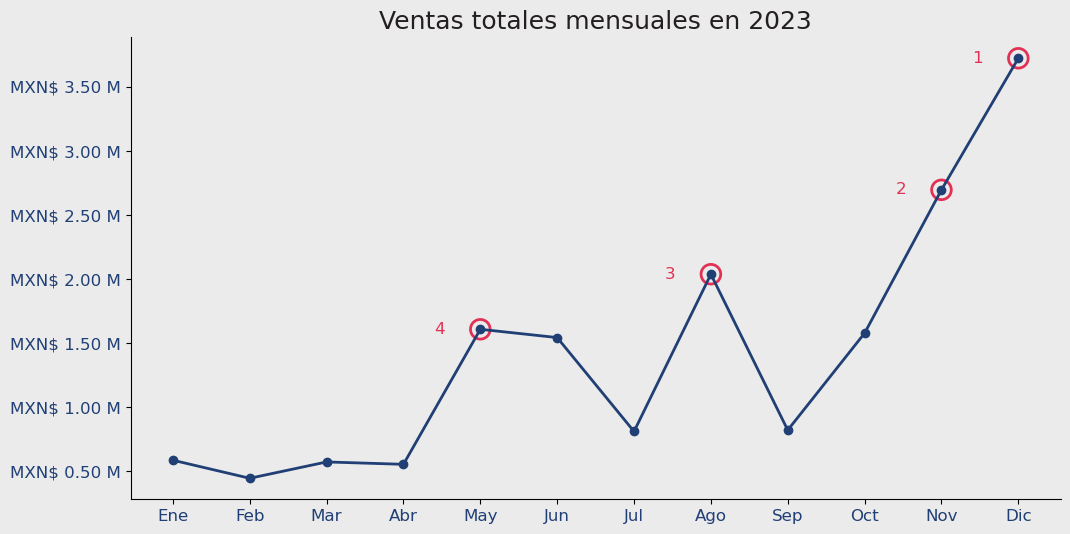

In [18]:
ventas_mensuales().show()

## Gr√°fico 3: Facturaci√≥n por categor√≠a de producto en 2023

```python
# 1. Crear una columna de facturaci√≥n total por compra
df["facturacion"] = df["precio_unitario"] * df["cantidad"] + df["envio"]

# 2. Agrupar por categor√≠a y sumar la facturaci√≥n
facturacion_categoria = df.groupby("categoria")["facturacion"].sum().sort_values()

# 3. Visualizaci√≥n en barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(
    x=facturacion_categoria.values, y=facturacion_categoria.index, palette="viridis"
)

plt.title("Facturaci√≥n por Categor√≠a de Producto")
plt.xlabel("Facturaci√≥n Total (MXN)")
plt.ylabel("Categor√≠a")
plt.tight_layout()
plt.show()

```

### Mejorando el gr√°fico

#### Prompt

Ahora, vamos refinar el gr√°fico de facturaci√≥n por categor√≠a. Recuerda que este gr√°fico fue de barras horizontales.

El script original del gr√°fico es el siguiente:

```python
# 1. Crear una columna de facturaci√≥n total por compra
df["facturacion"] = df["precio_unitario"] * df["cantidad"] + df["envio"]

# 2. Agrupar por categor√≠a y sumar la facturaci√≥n
facturacion_categoria = df.groupby("categoria")["facturacion"].sum().sort_values()

# 3. Visualizaci√≥n en barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(
    x=facturacion_categoria.values, y=facturacion_categoria.index, palette="viridis"
)

plt.title("Facturaci√≥n por Categor√≠a de Producto")
plt.xlabel("Facturaci√≥n Total (MXN)")
plt.ylabel("Categor√≠a")
plt.tight_layout()
plt.show()

```
Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, las barras en el color AQUA_1 y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "Facturaci√≥n por categor√≠a de producto en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben ser suprimidas al igual que los labels de los ejes x y y (xlabel y ylabel), y las etiquetas del eje y (yticks) deben tener tama√±o 12 con el color AZUL_1. Todas las bordes del gr√°fico deben ser suprimidas.

Adem√°s, es necesario mostrar el total de la facturaci√≥n de cada categor√≠a al lado derecho de cada barra, con el texto tambi√©n en color AZUL_1 y tama√±o 12.

Tambi√©n vamos a agregar un texto dentro del √°rea del gr√°fico. Para ello, divide el valor de la 1¬™ barra entre la suma de todas las barras y convi√©rtelo en un porcentaje, almacen√°ndolo en la variable "porcentaje".

Ahora, en la posici√≥n x = 0.4e7 y y = 5, agrega el siguiente texto con tama√±o 12 y color AZUL_3: f"$\\bf{porcentaje:.2f}$% de las ventas corresponden √∫nicamente a las ventas de Electr√≥nica.\nEsto equivale a casi el doble en relaci√≥n con todas las dem√°s categor√≠as\npresentes en el portafolio de Zoop.".

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.

#### Respuesta

Aqu√≠ tienes el c√≥digo refinado que genera el gr√°fico de **facturaci√≥n por categor√≠a de producto en 2023**, cumpliendo con los requerimientos visuales de identidad Zoop y la anotaci√≥n especial sobre el desempe√±o de la categor√≠a "Electr√≥nica":

---

### ‚úÖ C√≥digo actualizado con estilo Zoop:

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Colores corporativos
ROJO_1, ROJO_2, ROJO_3 = "#e23155", "#cc2c4e", "#b32742"
AZUL_1, AZUL_2, AZUL_3 = "#203f75", "#1c3867", "#19325b"
BLANCO, GRIS_1, GRIS_2, GRIS_3, GRIS_4, GRIS_5 = (
    "#ffffff", "#ebebeb", "#d9d9d9", "#cccccc", "#555655", "#231f20"
)
AQUA_1, AQUA_2, AQUA_3 = "#addcd4", "#9fccc5", "#96bfb9"

# 1. Crear columna de facturaci√≥n total por compra
df["facturacion"] = df["precio_unitario"] * df["cantidad"] + df["envio"]

# 2. Agrupar por categor√≠a y ordenar por facturaci√≥n
facturacion_categoria = df.groupby("categoria")["facturacion"].sum().sort_values()

# 3. Calcular porcentaje de la categor√≠a con mayor facturaci√≥n
mayor_categoria_valor = facturacion_categoria.values[-1]
porcentaje = (mayor_categoria_valor / facturacion_categoria.sum()) * 100

# 4. Visualizaci√≥n personalizada
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=facturacion_categoria.values,
    y=facturacion_categoria.index,
    palette=[AQUA_1] * len(facturacion_categoria)
)

# Estilo general
ax.set_facecolor(GRIS_1)
plt.gcf().set_facecolor(GRIS_1)
plt.title("Facturaci√≥n por categor√≠a de producto en 2023", fontsize=18, color=GRIS_5)

# Ejes
ax.tick_params(axis="y", labelsize=12, colors=AZUL_1)
ax.tick_params(axis="x", bottom=False, labelbottom=False)
ax.set_xlabel("")
ax.set_ylabel("")

# Quitar bordes
sns.despine(left=True, bottom=True, right=True, top=True)

# Mostrar valores al final de cada barra
for i, valor in enumerate(facturacion_categoria.values):
    ax.text(
        valor + 1e5,  # peque√±a separaci√≥n a la derecha de la barra
        i,
        f"$MXN{valor/1e6:.2f}M",
        va="center",
        fontsize=12,
        color=AZUL_1
    )

# A√±adir texto explicativo
plt.text(
    0.4e7,
    5,
    f"$\\bf{{{porcentaje:.2f}}}$% de las ventas corresponden √∫nicamente a las ventas de Electr√≥nica.\n"
    "Esto equivale a casi el doble en relaci√≥n con todas las dem√°s categor√≠as\n"
    "presentes en el portafolio de Zoop.",
    fontsize=12,
    color=AZUL_3
)

plt.tight_layout()
plt.show()
```

---

### üéØ ¬øQu√© incluye este gr√°fico?

* ‚úÖ Fondo de figura y √°rea de gr√°fico en `GRIS_1`
* ‚úÖ Barras horizontales en `AQUA_1`
* ‚úÖ Etiquetas del eje Y en `AZUL_1`, tama√±o 12
* ‚úÖ Texto de facturaci√≥n en formato `MXN` millones al lado derecho
* ‚úÖ T√≠tulo con estilo Zoop: tama√±o 18 y color `GRIS_5`
* ‚úÖ Anotaci√≥n estrat√©gica dentro del √°rea del gr√°fico resaltando la participaci√≥n de "Electr√≥nica"

¬øDeseas adaptar este mismo estilo para otro tipo de desagregaci√≥n, como por marca o tipo de env√≠o?

In [48]:
def facturacion_por_categoria():
    # 1. Crear columna de facturaci√≥n total por compra
    df["facturacion"] = df["precio_unitario"] * df["cantidad"] + df["envio"]

    # 2. Agrupar por categor√≠a y ordenar por facturaci√≥n
    facturacion_categoria = df.groupby("categoria")["facturacion"].sum().sort_values()

    # 3. Calcular porcentaje de la categor√≠a con mayor facturaci√≥n
    mayor_categoria_valor = facturacion_categoria.values[-1]
    porcentaje = (mayor_categoria_valor / facturacion_categoria.sum()) * 100

    # 4. Visualizaci√≥n personalizada
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x=facturacion_categoria.values,
        y=facturacion_categoria.index,
        palette=[AQUA_1] * len(facturacion_categoria),
    )

    # Estilo general
    ax.set_facecolor(GRIS_1)
    plt.gcf().set_facecolor(GRIS_1)
    plt.title("Facturaci√≥n por categor√≠a de producto en 2023", fontsize=18, color=GRIS_5)

    # Ejes
    ax.tick_params(axis="y", labelsize=12, colors=AZUL_1)
    ax.tick_params(axis="x", bottom=False, labelbottom=False)
    ax.set_xlabel("")
    ax.set_ylabel("")

    # Quitar bordes
    sns.despine(left=True, bottom=True, right=True, top=True)

    # Mostrar valores al final de cada barra
    for i, valor in enumerate(facturacion_categoria.values):
        ax.text(
            valor + 1e5,  # peque√±a separaci√≥n a la derecha de la barra
            i,
            f"MXN${valor/1e6:.2f}M",
            va="center",
            fontsize=12,
            color=AZUL_1,
        )

    # A√±adir texto explicativo
    plt.text(
        0.4e7,
        1.4,  # modificado
        f"$\\bf{{{porcentaje:.2f}}}$% de las ventas corresponden √∫nicamente a las ventas\n de Electr√≥nica."
        "Esto equivale a casi el doble en relaci√≥n con\n todas las dem√°s categor√≠as"
        "presentes en el portafolio de Zoop.",
        fontsize=12,
        color=AZUL_3,
    )

    plt.tight_layout()
    return plt

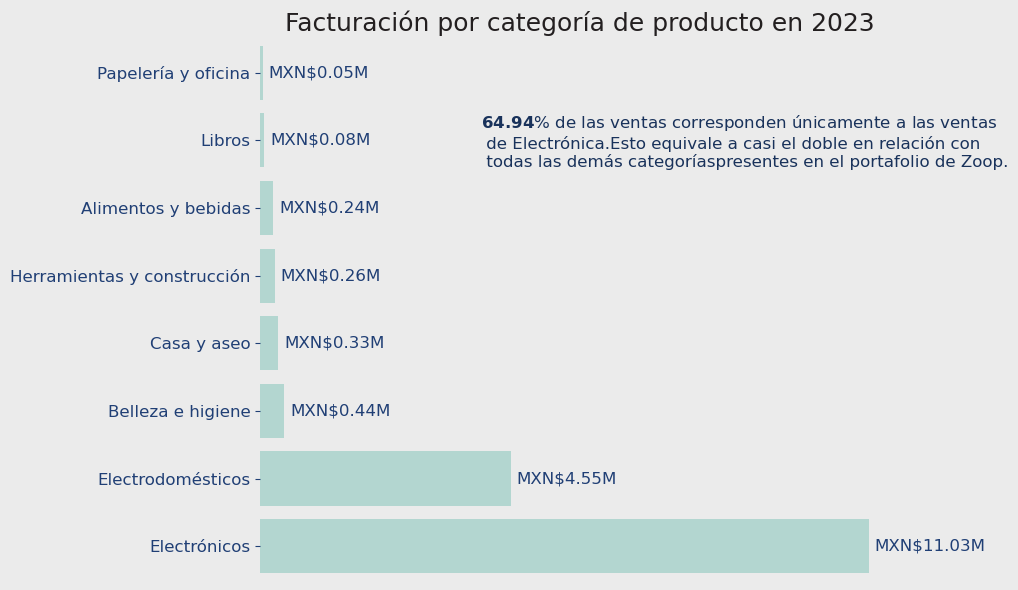

In [46]:
facturacion_por_categoria().show()

## Gr√°fico 4: Ventas por trimestre y m√©todo de pago

### Prompt

Ahora vamos con el gr√°fico de Ventas por Trimestre y M√©todo de Pago que producimos anteriormente. Vamos a refinarlo usando las siguientes directrices.

Recuerda que el script original del gr√°fico es el siguiente:
```python
# 1. Asegurar que 'fecha' es datetime
df["fecha"] = pd.to_datetime(df["fecha"])

# 2. Crear columna de trimestre (formato 'T1', 'T2', etc.)
df["trimestre"] = df["fecha"].dt.to_period("Q").astype(str).str.replace("2023Q", "T")

# 3. Agrupar por trimestre y m√©todo de pago, sumando facturaci√≥n
ventas_trimestre = (
    df.groupby(["trimestre", "metodo_pago"])["facturacion"].sum().unstack(fill_value=0)
)

# 4. Crear gr√°fico de barras apiladas
ventas_trimestre.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="tab20c")

plt.title("Facturaci√≥n por Trimestre y M√©todo de Pago - Zoop")
plt.xlabel("Trimestre")
plt.ylabel("Facturaci√≥n")
plt.legend(title="M√©todo de Pago por trimestre de 2023")

# Rotar etiquetas del eje X
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1 y el tama√±o de la figura debe ser de (10, 6). La secuencia de colores de las columnas apiladas (palette) es [BLANCO, GRIS_3, GRIS_1, GRIS_3].

El t√≠tulo de la figura es "Ventas por Trimestre y M√©todo de Pago en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben estar a 0 grados y tener tama√±o 12 con el color AZUL_1. Las etiquetas del eje y (yticks) deben estar en el formato f"MXN$ valor M" sin decimales y las etiquetas de los ejes x e y (xlabel e ylabel) deben ser suprimidas. Todos los bordes del gr√°fico deben ser suprimidos(['top','bottom','left','right]).

Tambi√©n agrega una cuadr√≠cula punteada en y.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.

### Respuesta

Aqu√≠ tienes el gr√°fico de **Ventas por Trimestre y M√©todo de Pago en 2023** completamente refinado para seguir la identidad visual de Zoop, utilizando `matplotlib` y `pandas`.

---

### ‚úÖ C√≥digo Refinado:

```python
import pandas as pd
import matplotlib.pyplot as plt

# Colores institucionales Zoop
ROJO_1, ROJO_2, ROJO_3 = "#e23155", "#cc2c4e", "#b32742"
AZUL_1, AZUL_2, AZUL_3 = "#203f75", "#1c3867", "#19325b"
BLANCO, GRIS_1, GRIS_2, GRIS_3, GRIS_4, GRIS_5 = (
    "#ffffff", "#ebebeb", "#d9d9d9", "#cccccc", "#555655", "#231f20"
)
AQUA_1, AQUA_2, AQUA_3 = "#addcd4", "#9fccc5", "#96bfb9"

# 1. Asegurar que 'fecha' es datetime
df["fecha"] = pd.to_datetime(df["fecha"])

# 2. Crear columna de trimestre
df["trimestre"] = df["fecha"].dt.to_period("Q").astype(str).str.replace("2023Q", "T")

# 3. Agrupar por trimestre y m√©todo de pago
ventas_trimestre = (
    df.groupby(["trimestre", "metodo_pago"])["facturacion"]
    .sum()
    .unstack(fill_value=0)
)

# 4. Colores personalizados
colores = [BLANCO, GRIS_3, GRIS_1, GRIS_3]  # Si hay m√°s m√©todos, se repetir√°

# 5. Crear gr√°fico apilado
fig, ax = plt.subplots(figsize=(10, 6), facecolor=GRIS_1)
ventas_trimestre.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    color=colores,
    edgecolor=GRIS_1,
)

# 6. Personalizaci√≥n visual
ax.set_facecolor(GRIS_1)
ax.set_title("Ventas por Trimestre y M√©todo de Pago en 2023", fontsize=18, color=GRIS_5)

# Eje X
ax.set_xlabel("")
ax.set_xticklabels(ventas_trimestre.index, fontsize=12, color=AZUL_1, rotation=0)

# Eje Y
ax.set_ylabel("")
yticks_mxn = [f"MXN${int(y / 1e6)}M" for y in ax.get_yticks()]
ax.set_yticklabels(yticks_mxn, fontsize=12, color=AZUL_1)

# Leyenda
ax.legend(title="M√©todo de Pago por trimestre de 2023", loc="upper left")

# Bordes eliminados
for spine in ["top", "bottom", "left", "right"]:
    ax.spines[spine].set_visible(False)

# Cuadr√≠cula punteada en Y
ax.yaxis.grid(True, linestyle=":", color=GRIS_3)
ax.xaxis.grid(False)

plt.tight_layout()
plt.show()
```

---

### üéØ ¬øQu√© logramos?

* Gr√°fico limpio, corporativo y legible.
* Estilo apilado para comparar m√©todos de pago dentro de cada trimestre.
* Etiquetas en millones (`MXN$`) y cuadr√≠cula sutil para facilitar el an√°lisis.
* Dise√±o profesional completamente alineado con la identidad visual de Zoop.

¬øTe gustar√≠a hacer una versi√≥n interactiva en Plotly o destacar alg√∫n m√©todo de pago espec√≠fico con otro color?

In [54]:
def ventas_por_trimestre():
    # 1. Asegurar que 'fecha' es datetime
    df["fecha"] = pd.to_datetime(df["fecha"])

    # 2. Crear columna de trimestre
    df["trimestre"] = df["fecha"].dt.to_period("Q").astype(str).str.replace("2023Q", "T")

    # 3. Agrupar por trimestre y m√©todo de pago
    ventas_trimestre = (
        df.groupby(["trimestre", "metodo_pago"])["facturacion"].sum().unstack(fill_value=0)
    )

    # 4. Colores personalizados
    colores = [BLANCO, GRIS_3, AQUA_1, AQUA_3]  # Si hay m√°s m√©todos, se repetir√° #modificado

    # 5. Crear gr√°fico apilado
    fig, ax = plt.subplots(figsize=(10, 6), facecolor=GRIS_1)
    ventas_trimestre.plot(
        kind="bar",
        stacked=True,
        ax=ax,
        color=colores,
        edgecolor=GRIS_1,
    )

    # 6. Personalizaci√≥n visual
    ax.set_facecolor(GRIS_1)
    ax.set_title("Ventas por Trimestre y M√©todo de Pago en 2023", fontsize=18, color=GRIS_5)

    # Eje X
    ax.set_xlabel("")
    ax.set_xticklabels(ventas_trimestre.index, fontsize=12, color=AZUL_1, rotation=0)

    # Eje Y
    ax.set_ylabel("")
    yticks_mxn = [f"MXN${int(y / 1e6)}M" for y in ax.get_yticks()]
    ax.set_yticklabels(yticks_mxn, fontsize=12, color=AZUL_1)

    # Leyenda
    ax.legend(title="M√©todo de Pago por trimestre de 2023", loc="upper left")

    # Bordes eliminados
    for spine in ["top", "bottom", "left", "right"]:
        ax.spines[spine].set_visible(False)

    # Cuadr√≠cula punteada en Y
    ax.yaxis.grid(True, linestyle=":", color=GRIS_3)
    ax.xaxis.grid(False)

    plt.tight_layout()
    return plt

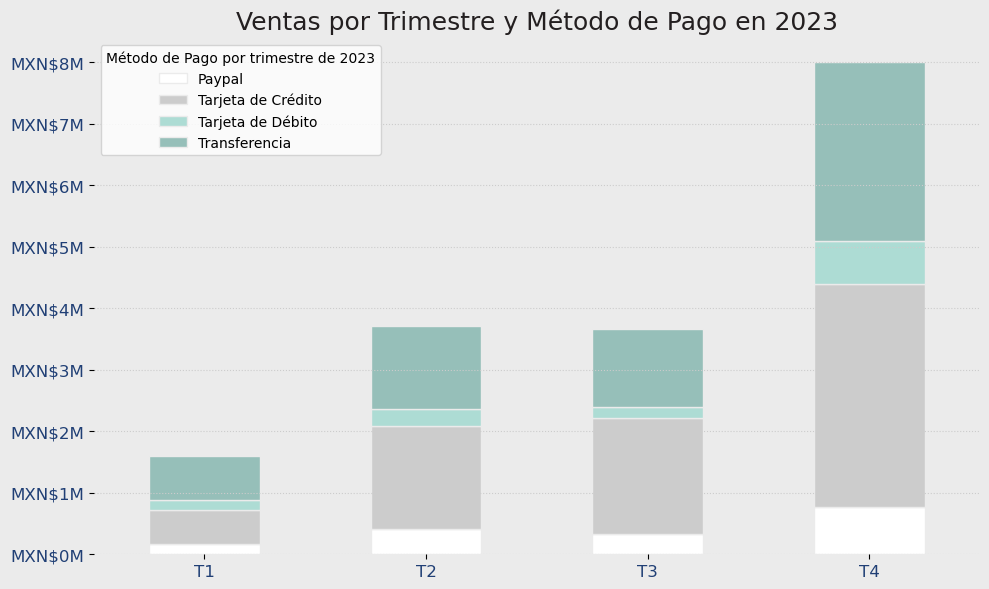

In [55]:
ventas_por_trimestre().show()

#### Comentarios
---
Ajustamos el gr√°fico de barras apiladas representando con colores m√°s suaves los valores de los m√©todos de pago. Podemos notar cosas interesantes en este gr√°fico, como: el 2¬∫ y 4¬∫ trimestre siendo los momentos en que Zoop factura m√°s con ventas, y tambi√©n el aumento en los pagos de las compras realizadas por los clientes mediante tarjeta de cr√©dito.

## Gr√°fico 5: Clientes participantes del programa de cashback

In [57]:
import plotly.express as px

# Contar cu√°ntos clientes participan o no en el programa
cashback_counts = df["cashback"].value_counts().reset_index()
cashback_counts.columns = ["Participa", "Cantidad"]

# Crear diccionario de colores personalizados
colores_personalizados = {"S√≠": "#2ecc71", "No": "#e74c3c"}  # Verde  # Rojo

# Definir explosi√≥n para separar las secciones del gr√°fico
pull_valores = [0.1 if val == "S√≠" else 0.05 for val in cashback_counts["Participa"]]

# Crear gr√°fico circular con colores y separaci√≥n
fig = px.pie(
    cashback_counts,
    names="Participa",
    values="Cantidad",
    title="Proporci√≥n de participaci√≥n en el programa de cashback de Zoop",
    color="Participa",
    color_discrete_map=colores_personalizados,
    # hole=0.3,
)

# Aplicar la separaci√≥n (pull)
fig.update_traces(pull=pull_valores)

# Mostrar gr√°fico interactivo
fig.show()

### Prompt

Ahora, vamos a refinar el gr√°fico de dona que produjimos para la proporci√≥n de usuarios que se adhieren al programa de cashback.

Recuerda que el script original del gr√°fico es el siguiente:

```python
import plotly.express as px

# Contar cu√°ntos clientes participan o no en el programa
cashback_counts = df["cashback"].value_counts().reset_index()
cashback_counts.columns = ["Participa", "Cantidad"]

# Crear diccionario de colores personalizados
colores_personalizados = {"S√≠": "#2ecc71", "No": "#e74c3c"}  # Verde  # Rojo

# Definir explosi√≥n para separar las secciones del gr√°fico
pull_valores = [0.1 if val == "S√≠" else 0.05 for val in cashback_counts["Participa"]]

# Crear gr√°fico circular con colores y separaci√≥n
fig = px.pie(
    cashback_counts,
    names="Participa",
    values="Cantidad",
    title="Proporci√≥n de participaci√≥n en el programa de cashback de Zoop",
    color="Participa",
    color_discrete_map=colores_personalizados,
    # hole=0.3,
)

# Aplicar la separaci√≥n (pull)
fig.update_traces(pull=pull_valores)

# Mostrar gr√°fico interactivo
fig.show()
```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, debe ser un gr√°fico de dona con el fondo de la figura y del gr√°fico en el color GRIS_1, el color de la porci√≥n de valor "No" igual a GRIS_3, el color de la porci√≥n de valor "S√≠" igual a AZUL_1 y el tama√±o de la figura debe ser de (6, 6).

El t√≠tulo de la figura es "¬øParticipan en el programa de cashback?" con un tama√±o de 18 y su color GRIS_5.

Las etiquetas de las porciones deben tener el mismo color que las porciones y un tama√±o de 12, y los porcentajes deben estar en color BLANCO, tambi√©n con un tama√±o de 12.

La propiedad de ancho de la dona (wedgeprops) debe ser de 0.4, la posici√≥n de los porcentajes dentro de la porci√≥n (pctdistance) debe ser de 0.8, el √°ngulo de inicio debe ser de 180 (startangle), y sin explosi√≥n de porciones.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.

### Respuesta

Aqu√≠ tienes el gr√°fico de dona refinado sobre la participaci√≥n en el programa de cashback de Zoop, **siguiendo fielmente la identidad visual de Zoop y todos los par√°metros solicitados**, utilizando **`matplotlib`**:

---

### ‚úÖ C√≥digo con `matplotlib`:

```python
import pandas as pd
import matplotlib.pyplot as plt

# Colores institucionales Zoop
ROJO_1, ROJO_2, ROJO_3 = "#e23155", "#cc2c4e", "#b32742"
AZUL_1, AZUL_2, AZUL_3 = "#203f75", "#1c3867", "#19325b"
BLANCO, GRIS_1, GRIS_2, GRIS_3, GRIS_4, GRIS_5 = (
    "#ffffff", "#ebebeb", "#d9d9d9", "#cccccc", "#555655", "#231f20"
)
AQUA_1, AQUA_2, AQUA_3 = "#addcd4", "#9fccc5", "#96bfb9"

# Contar participaci√≥n en programa cashback
cashback_counts = df["cashback"].value_counts().reset_index()
cashback_counts.columns = ["Participa", "Cantidad"]

# Preparar datos para el gr√°fico
labels = cashback_counts["Participa"]
sizes = cashback_counts["Cantidad"]
colors = [AZUL_1 if label == "S√≠" else GRIS_3 for label in labels]

# Crear gr√°fico de dona
fig, ax = plt.subplots(figsize=(6, 6), facecolor=GRIS_1)
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    startangle=180,
    wedgeprops={"width": 0.4},
    pctdistance=0.8,
    autopct="%1.0f%%",
    textprops={"fontsize": 12, "weight": "bold"},
)

# Personalizar etiquetas y porcentajes
for text, label in zip(texts, labels):
    text.set_color(AZUL_1 if label == "S√≠" else GRIS_3)
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_color(BLANCO)
    autotext.set_fontsize(12)

# Fondo del gr√°fico
ax.set_facecolor(GRIS_1)
fig.patch.set_facecolor(GRIS_1)

# T√≠tulo
plt.title("¬øParticipan en el programa de cashback?", fontsize=18, color=GRIS_5)

plt.tight_layout()
plt.show()
```

---

### üéØ Ajustes realizados:

* ‚úÖ Dona de grosor 0.4 (`wedgeprops`).
* ‚úÖ Inicio en 180¬∞ (`startangle=180`).
* ‚úÖ Sin explosiones.
* ‚úÖ Colores Zoop: `AZUL_1` y `GRIS_3`.
* ‚úÖ Porcentajes en blanco (`BLANCO`) y etiquetas del mismo color de sus porciones.
* ‚úÖ Estilo sobrio y profesional con fondo `GRIS_1`.

¬øQuieres agregar una anotaci√≥n dentro de la dona o exportar este gr√°fico como imagen?

In [ ]:
def proporcion_cashback():
    # Contar participaci√≥n en programa cashback
    cashback_counts = df["cashback"].value_counts().reset_index()
    cashback_counts.columns = ["Participa", "Cantidad"]

    # Preparar datos para el gr√°fico
    labels = cashback_counts["Participa"]
    sizes = cashback_counts["Cantidad"]
    colors = [AZUL_1 if label == "S√≠" else GRIS_3 for label in labels]

    # Crear gr√°fico de dona
    fig, ax = plt.subplots(figsize=(6, 6), facecolor=GRIS_1)
    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        colors=colors,
        startangle=180,
        wedgeprops={"width": 0.4},
        pctdistance=0.8,
        autopct="%1.0f%%",
        textprops={"fontsize": 12, "weight": "bold"},
    )

    # Personalizar etiquetas y porcentajes
    for text, label in zip(texts, labels):
        text.set_color(AZUL_1 if label == "S√≠" else GRIS_3)
        text.set_fontsize(12)
    for autotext in autotexts:
        autotext.set_color(BLANCO)
        autotext.set_fontsize(12)

    # Fondo del gr√°fico
    ax.set_facecolor(GRIS_1)
    fig.patch.set_facecolor(GRIS_1)

    # T√≠tulo
    plt.title("¬øParticipan en el programa de cashback?", fontsize=18, color=GRIS_5)

    plt.tight_layout()
    return plt

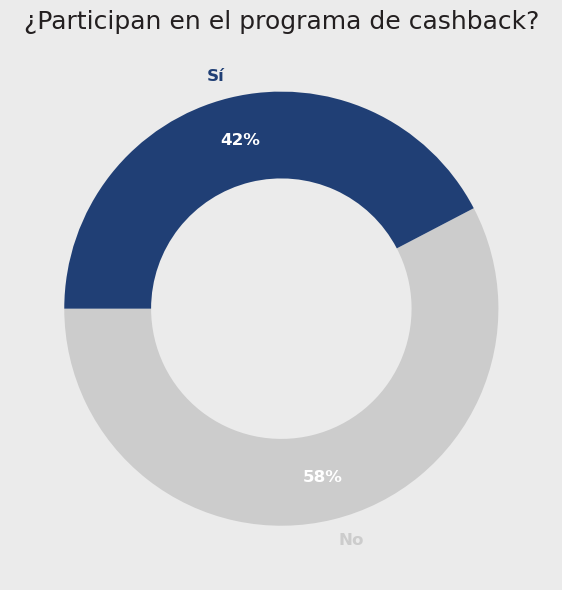

In [61]:
proporcion_cashback().show()

## Gr√°fico 6: Evaluaciones de los productos:

In [62]:
import plotly.express as px

# Crear histograma con Plotly
fig = px.histogram(
    df,
    x="nota",
    nbins=11,  # de 0 a 10, enteros
    title="Distribuci√≥n de las calificaciones del p√∫blico",
    labels={"nota": "Calificaci√≥n", "count": "Cantidad"},
    color_discrete_sequence=["#3498db"],
)

fig.update_layout(bargap=0.2)  # separaci√≥n entre barras
fig.show()

### Prompt

Ahora vamos con el gr√°fico de la Distribuci√≥n de las Evaluaciones de Compra que produjimos anteriormente. Vamos a refinarlo usando las siguientes orientaciones.

El script original que genera el gr√°fico es el siguiente:

```python
# Crear histograma con Plotly
fig = px.histogram(
    df,
    x="nota",
    nbins=11,  # de 0 a 10, enteros
    title="Distribuci√≥n de las calificaciones del p√∫blico",
    labels={"nota": "Calificaci√≥n", "count": "Cantidad"},
    color_discrete_sequence=["#3498db"],
)

fig.update_layout(bargap=0.2)  # separaci√≥n entre barras
fig.show()
```

Nuestro gr√°fico necesita seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, el color de las columnas en ROJO_1 y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "Distribuci√≥n de las evaluaciones de las compras en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben estar en el rango de 0 a 10 con 11 bins y tener tama√±o 12 con el color AZUL_1. Las etiquetas del eje y (yticks) deben tener tama√±o 12 con el color AZUL_1 y las etiquetas de los ejes x e y (xlabel e ylabel) tambi√©n deben tener tama√±o 12 con el color AZUL_1. Todos los bordes del gr√°fico deben ser suprimidos (['top', 'bottom', 'left', 'right']).

El grid del eje y debe estar detr√°s del gr√°fico (ax.set_axisbelow(True)).

Vamos a a√±adir una caja de anotaci√≥n (ax.annotate()) con el fondo en color BLANCO y el borde en color GRIS_3 dentro del √°rea del gr√°fico. El texto de la anotaci√≥n es

f"Promedio de calificaciones = {df['nota'].mean().round(2)}\n Calificaci√≥n m√°s com√∫n = {df['nota'].value_counts().idxmax()}\n Frecuencia m√°s com√∫n = {df['nota'].value_counts().max()}"
en color AZUL_1. A√±ade la caja de anotaci√≥n con el texto en la posici√≥n xytext=(2, 1800) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posici√≥n xy=(8.7, 2250).

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.

### Respuesta

Aqu√≠ tienes el gr√°fico refinado de **distribuci√≥n de las evaluaciones de compra en 2023**, ahora totalmente ajustado a la **identidad visual de Zoop** y usando √∫nicamente **`matplotlib`**:

---

### ‚úÖ C√≥digo con `matplotlib`:

```python
import matplotlib.pyplot as plt
import pandas as pd

# Paleta de colores institucional Zoop
ROJO_1 = "#e23155"
AZUL_1 = "#203f75"
GRIS_1 = "#ebebeb"
GRIS_3 = "#cccccc"
GRIS_5 = "#231f20"
BLANCO = "#ffffff"

# Crear histograma personalizado
fig, ax = plt.subplots(figsize=(10, 6), facecolor=GRIS_1)

# Histograma con 11 bins (0 a 10)
n, bins, patches = ax.hist(
    df["nota"],
    bins=11,
    color=ROJO_1,
    edgecolor=GRIS_1
)

# Ajustes del √°rea del gr√°fico
ax.set_facecolor(GRIS_1)
ax.set_axisbelow(True)  # Grid detr√°s de las barras

# T√≠tulo
ax.set_title(
    "Distribuci√≥n de las evaluaciones de las compras en 2023",
    fontsize=18,
    color=GRIS_5
)

# Ejes y etiquetas
ax.set_xlabel("Calificaci√≥n", fontsize=12, color=AZUL_1)
ax.set_ylabel("Cantidad", fontsize=12, color=AZUL_1)

# Personalizar xticks y yticks
ax.set_xticks(range(0, 11))
ax.tick_params(axis="x", labelsize=12, colors=AZUL_1)
ax.tick_params(axis="y", labelsize=12, colors=AZUL_1)

# Grid en el eje y
ax.yaxis.grid(True, linestyle="--", color=GRIS_3)

# Eliminar bordes
for spine in ["top", "bottom", "left", "right"]:
    ax.spines[spine].set_visible(False)

# Calcular m√©tricas para anotaci√≥n
media = df["nota"].mean().round(2)
moda = df["nota"].value_counts().idxmax()
frecuencia = df["nota"].value_counts().max()

# Anotaci√≥n con flecha
texto = (
    f"Promedio de calificaciones = {media}\n"
    f"Calificaci√≥n m√°s com√∫n = {moda}\n"
    f"Frecuencia m√°s com√∫n = {frecuencia}"
)
ax.annotate(
    texto,
    xy=(8.7, 2250),  # Punto final de la flecha
    xytext=(2, 1800),  # Posici√≥n de la caja
    textcoords="data",
    fontsize=12,
    color=AZUL_1,
    ha="left",
    bbox=dict(boxstyle="round", facecolor=BLANCO, edgecolor=GRIS_3),
    arrowprops=dict(arrowstyle="->", color=AZUL_1)
)

plt.tight_layout()
plt.show()
```

---

### ‚úÖ Ajustes aplicados:

* üéØ Fondo general y √°rea del gr√°fico: `GRIS_1`.
* üî¥ Color de las barras: `ROJO_1`.
* üìå T√≠tulo en `GRIS_5`, tama√±o 18.
* üî† Etiquetas y ticks en `AZUL_1`, tama√±o 12.
* üßæ Anotaci√≥n con flecha personalizada destacando m√©tricas clave.
* üö´ Eliminados todos los bordes del gr√°fico.
* ‚úÖ Grid punteado detr√°s de las barras.

¬øQuieres exportarlo a PDF o agregarlo a un dashboard interactivo?

In [64]:
def distribucion_calificaciones():
    # Crear histograma personalizado
    fig, ax = plt.subplots(figsize=(10, 6), facecolor=GRIS_1)

    # Histograma con 11 bins (0 a 10)
    n, bins, patches = ax.hist(df["nota"], bins=11, color=ROJO_1, edgecolor=GRIS_1)

    # Ajustes del √°rea del gr√°fico
    ax.set_facecolor(GRIS_1)
    ax.set_axisbelow(True)  # Grid detr√°s de las barras

    # T√≠tulo
    ax.set_title(
        "Distribuci√≥n de las evaluaciones de las compras en 2023", fontsize=18, color=GRIS_5
    )

    # Ejes y etiquetas
    ax.set_xlabel("Calificaci√≥n", fontsize=12, color=AZUL_1)
    ax.set_ylabel("Cantidad", fontsize=12, color=AZUL_1)

    # Personalizar xticks y yticks
    ax.set_xticks(range(0, 11))
    ax.tick_params(axis="x", labelsize=12, colors=AZUL_1)
    ax.tick_params(axis="y", labelsize=12, colors=AZUL_1)

    # Grid en el eje y
    ax.yaxis.grid(True, linestyle="--", color=GRIS_3)

    # Eliminar bordes
    for spine in ["top", "bottom", "left", "right"]:
        ax.spines[spine].set_visible(False)

    # Calcular m√©tricas para anotaci√≥n
    media = df["nota"].mean().round(2)
    moda = df["nota"].value_counts().idxmax()
    frecuencia = df["nota"].value_counts().max()

    # Anotaci√≥n con flecha
    texto = (
        f"Promedio de calificaciones = {media}\n"
        f"Calificaci√≥n m√°s com√∫n = {moda}\n"
        f"Frecuencia m√°s com√∫n = {frecuencia}"
    )
    ax.annotate(
        texto,
        xy=(8.7, 2250),  # Punto final de la flecha
        xytext=(2, 1800),  # Posici√≥n de la caja
        textcoords="data",
        fontsize=12,
        color=AZUL_1,
        ha="left",
        bbox=dict(boxstyle="round", facecolor=BLANCO, edgecolor=GRIS_3),
        arrowprops=dict(arrowstyle="->", color=AZUL_1),
    )

    plt.tight_layout()
    return plt

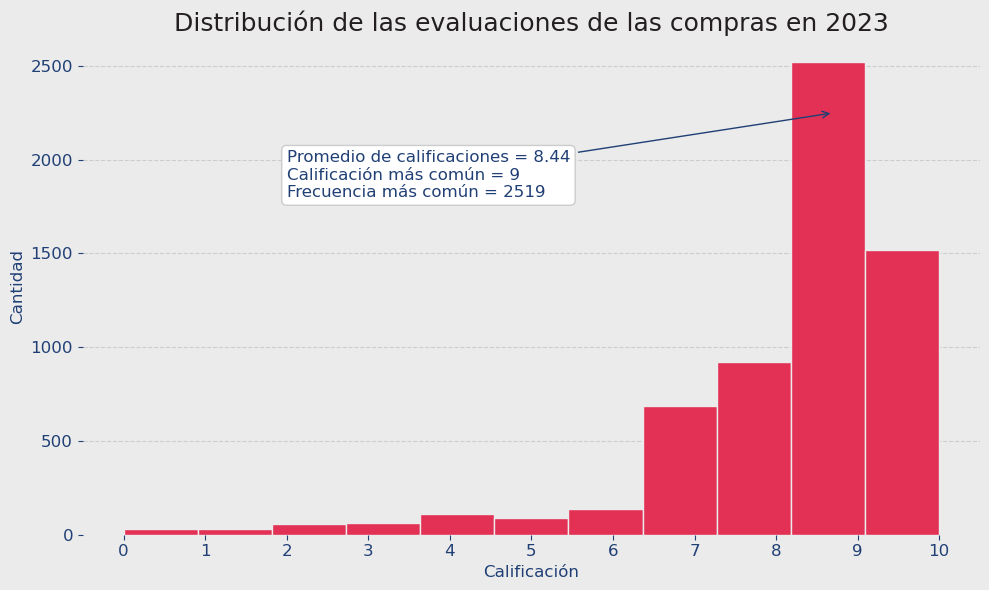

In [65]:
distribucion_calificaciones().show()

## Gr√°fico 7: Distribuci√≥n del p√∫blico por edad y sexo biol√≥gico

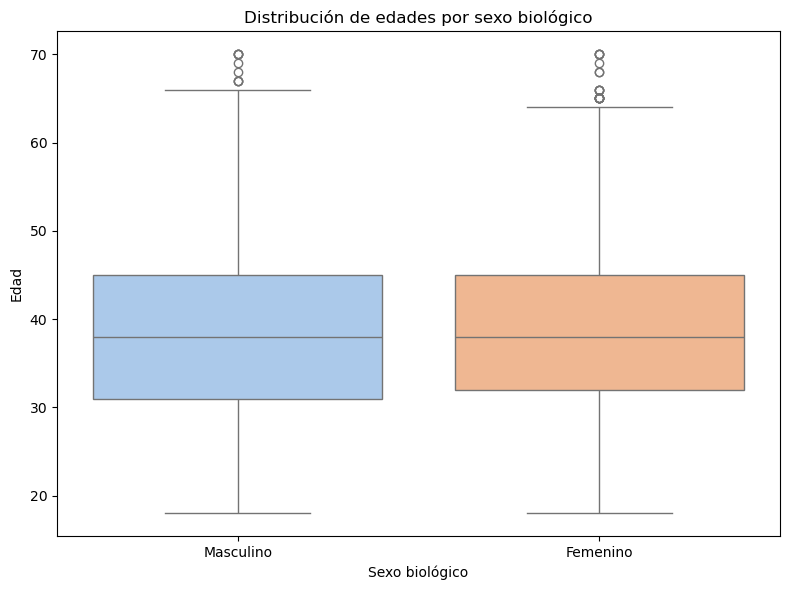

In [66]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="sexo_biologico", y="edad", palette="pastel")

plt.title("Distribuci√≥n de edades por sexo biol√≥gico")
plt.xlabel("Sexo biol√≥gico")
plt.ylabel("Edad")
plt.tight_layout()
plt.show()

### Prompt

Ahora vamos al gr√°fico de boxplot de la Distribuci√≥n de la Edad por Sexo Biol√≥gico que produjimos anteriormente. Vamos a refinado usando las siguientes orientaciones.

El script original que genera el gr√°fico es el siguiente:

```python
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="sexo_biologico", y="edad", palette="pastel")

plt.title("Distribuci√≥n de edades por sexo biol√≥gico")
plt.xlabel("Sexo biol√≥gico")
plt.ylabel("Edad")
plt.tight_layout()
plt.show()
```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "Distribuci√≥n de la Edad por Sexo Biol√≥gico de los clientes" con tama√±o 18 y su color GRIS_5.

La columna 'sexo_biologico' est√° representada en el eje x y la 'edad' en el eje y. La paleta de colores para los valores de x es [AZUL_1, AQUA_1].

La etiqueta del eje x (xlabel) debe ser suprimida. Los r√≥tulos del eje x y y (xticks y yticks) deben tener tama√±o 12 con el color AZUL_1 y la etiqueta del eje y (ylabel) tambi√©n debe tener tama√±o 12 con el color AZUL_1. Todos los bordes del gr√°fico deben ser suprimidos y la cuadr√≠cula del eje y debe estar detr√°s del gr√°fico (ax.set_axisbelow(True)).

Vamos a agregar dos cajas de anotaci√≥n (ax.annotate()) con el fondo en color BLANCO y el borde en color GRIS_3 dentro del √°rea del gr√°fico.

El texto de la primera anotaci√≥n en color AZUL_1 es

f"M√≠nimo = df.groupby("sexo_biologico")["edad"].min()[1]\n 1¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.25)[1]\n 2¬∫ quartil = df.groupby("sexo_biologico")["edad"].median()[1]\n 3¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.75)[1]\n M√°ximo = df.groupby("sexo_biologico")["edad"].max()[1]"
Agrega la caja de anotaci√≥n con el texto en la posici√≥n xytext=(-0.4, 50) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posici√≥n xy=(-0.1, 45).

El texto de la segunda anotaci√≥n en color AZUL_1 es

f"M√≠nimo = df.groupby("sexo_biologico")["edad"].min()[0]\n 1¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.25)[0]\n 2¬∫ quartil = df.groupby("sexo_biologico")["edad"].median()[0]\n 3¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.75)[0]\n M√°ximo = df.groupby("sexo_biologico")["edad"].max()[0]"
Agrega la caja de anotaci√≥n con el texto en la posici√≥n xytext=(0.6, 50) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posici√≥n xy=(0.9, 45).

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.

### Respuesta

Aqu√≠ tienes el gr√°fico **refinado de boxplot** para la *Distribuci√≥n de la Edad por Sexo Biol√≥gico de los clientes*, siguiendo completamente la identidad visual de Zoop y usando `matplotlib` + `seaborn`:

---

### ‚úÖ C√≥digo:

```python
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Paleta de colores institucional Zoop
AZUL_1 = "#203f75"
AQUA_1 = "#2dc6c6"
GRIS_1 = "#ebebeb"
GRIS_3 = "#cccccc"
GRIS_5 = "#231f20"
BLANCO = "#ffffff"

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6), facecolor=GRIS_1)

# Boxplot personalizado
sns.boxplot(
    data=df,
    x="sexo_biologico",
    y="edad",
    palette=[AZUL_1, AQUA_1],
    ax=ax
)

# Fondo del gr√°fico
ax.set_facecolor(GRIS_1)
ax.set_axisbelow(True)

# T√≠tulo
ax.set_title(
    "Distribuci√≥n de la Edad por Sexo Biol√≥gico de los clientes",
    fontsize=18,
    color=GRIS_5
)

# Suprimir xlabel
ax.set_xlabel("")

# Personalizar etiquetas
ax.set_ylabel("Edad", fontsize=12, color=AZUL_1)
ax.tick_params(axis="x", labelsize=12, colors=AZUL_1)
ax.tick_params(axis="y", labelsize=12, colors=AZUL_1)

# Cuadr√≠cula en eje y
ax.yaxis.grid(True, linestyle="--", color=GRIS_3)

# Eliminar bordes
for spine in ["top", "bottom", "left", "right"]:
    ax.spines[spine].set_visible(False)

# === Anotaci√≥n 1: sexo_biologico == 1 (por ejemplo, "Mujer") ===
grupo_fem = df.groupby("sexo_biologico")["edad"]
texto_1 = (
    f"M√≠nimo = {grupo_fem.min()[1]}\n"
    f"1¬∫ quartil = {grupo_fem.quantile(.25)[1]}\n"
    f"2¬∫ quartil = {grupo_fem.median()[1]}\n"
    f"3¬∫ quartil = {grupo_fem.quantile(.75)[1]}\n"
    f"M√°ximo = {grupo_fem.max()[1]}"
)
ax.annotate(
    texto_1,
    xy=(-0.1, 45),
    xytext=(-0.4, 50),
    textcoords="data",
    fontsize=12,
    color=AZUL_1,
    ha="left",
    bbox=dict(boxstyle="round", facecolor=BLANCO, edgecolor=GRIS_3),
    arrowprops=dict(arrowstyle="->", color=AZUL_1)
)

# === Anotaci√≥n 2: sexo_biologico == 0 (por ejemplo, "Hombre") ===
grupo_masc = df.groupby("sexo_biologico")["edad"]
texto_2 = (
    f"M√≠nimo = {grupo_masc.min()[0]}\n"
    f"1¬∫ quartil = {grupo_masc.quantile(.25)[0]}\n"
    f"2¬∫ quartil = {grupo_masc.median()[0]}\n"
    f"3¬∫ quartil = {grupo_masc.quantile(.75)[0]}\n"
    f"M√°ximo = {grupo_masc.max()[0]}"
)
ax.annotate(
    texto_2,
    xy=(0.9, 45),
    xytext=(0.6, 50),
    textcoords="data",
    fontsize=12,
    color=AZUL_1,
    ha="left",
    bbox=dict(boxstyle="round", facecolor=BLANCO, edgecolor=GRIS_3),
    arrowprops=dict(arrowstyle="->", color=AZUL_1)
)

plt.tight_layout()
plt.show()
```

---

### ‚úÖ Detalles aplicados:

* üìä **Fondo** de figura y gr√°fico: `GRIS_1`.
* üé® **Colores** de los boxplots: `[AZUL_1, AQUA_1]`.
* üìå **T√≠tulo** en `GRIS_5`, tama√±o 18.
* üî† **Etiquetas** y ticks en `AZUL_1`, tama√±o 12.
* üö´ Eliminaci√≥n de todos los bordes del gr√°fico.
* üîç **Anotaciones** con estad√≠sticas clave por sexo biol√≥gico, con flechas indicativas.
* ‚úÖ **Grid** punteado en eje y, detr√°s de las cajas.

¬øTe gustar√≠a convertirlo a formato interactivo con Plotly o exportarlo como imagen para un informe?


In [ ]:
def box_plot_edad_sexo():
    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(10, 6), facecolor=GRIS_1)

    # Boxplot personalizado
    sns.boxplot(data=df, x="sexo_biologico", y="edad", palette=[AZUL_1, AQUA_1], ax=ax)

    # Fondo del gr√°fico
    ax.set_facecolor(GRIS_1)
    ax.set_axisbelow(True)

    # T√≠tulo
    ax.set_title(
        "Distribuci√≥n de la Edad por Sexo Biol√≥gico de los clientes",
        fontsize=18,
        color=GRIS_5,
    )

    # Suprimir xlabel
    ax.set_xlabel("")

    # Personalizar etiquetas
    ax.set_ylabel("Edad", fontsize=12, color=AZUL_1)
    ax.tick_params(axis="x", labelsize=12, colors=AZUL_1)
    ax.tick_params(axis="y", labelsize=12, colors=AZUL_1)

    # Cuadr√≠cula en eje y
    ax.yaxis.grid(True, linestyle="--", color=GRIS_3)

    # Eliminar bordes
    for spine in ["top", "bottom", "left", "right"]:
        ax.spines[spine].set_visible(False)

    # === Anotaci√≥n 1: sexo_biologico == 1 (por ejemplo, "Mujer") ===
    grupo_fem = df.groupby("sexo_biologico")["edad"]
    texto_1 = (
        f"M√≠nimo = {grupo_fem.min()[1]}\n"
        f"1¬∫ quartil = {grupo_fem.quantile(.25)[1]}\n"
        f"2¬∫ quartil = {grupo_fem.median()[1]}\n"
        f"3¬∫ quartil = {grupo_fem.quantile(.75)[1]}\n"
        f"M√°ximo = {grupo_fem.max()[1]}"
    )
    ax.annotate(
        texto_1,
        xy=(-0.1, 45),
        xytext=(-0.4, 50),
        textcoords="data",
        fontsize=12,
        color=AZUL_1,
        ha="left",
        bbox=dict(boxstyle="round", facecolor=BLANCO, edgecolor=GRIS_3),
        arrowprops=dict(arrowstyle="->", color=AZUL_1),
    )

    # === Anotaci√≥n 2: sexo_biologico == 0 (por ejemplo, "Hombre") ===
    grupo_masc = df.groupby("sexo_biologico")["edad"]
    texto_2 = (
        f"M√≠nimo = {grupo_masc.min()[0]}\n"
        f"1¬∫ quartil = {grupo_masc.quantile(.25)[0]}\n"
        f"2¬∫ quartil = {grupo_masc.median()[0]}\n"
        f"3¬∫ quartil = {grupo_masc.quantile(.75)[0]}\n"
        f"M√°ximo = {grupo_masc.max()[0]}"
    )
    ax.annotate(
        texto_2,
        xy=(0.9, 45),
        xytext=(0.6, 50),
        textcoords="data",
        fontsize=12,
        color=AZUL_1,
        ha="left",
        bbox=dict(boxstyle="round", facecolor=BLANCO, edgecolor=GRIS_3),
        arrowprops=dict(arrowstyle="->", color=AZUL_1),
    )

    plt.tight_layout()
    return plt

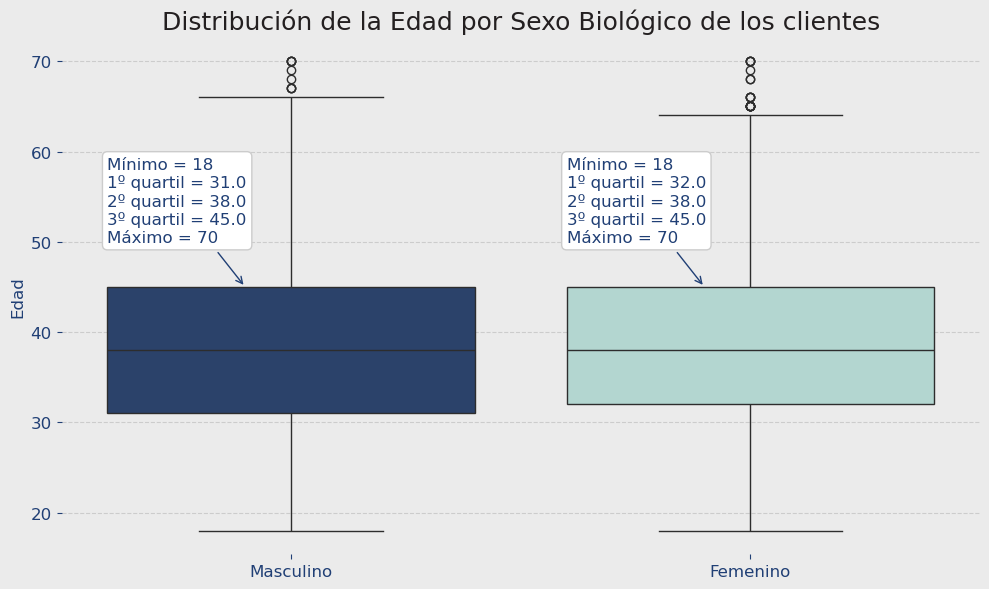

In [69]:
box_plot_edad_sexo().show()

# Exportando los gr√°ficos

### Prompt

Ahora, vamos a nuestra √∫ltima etapa: guardar las visualizaciones como imagen.

Genera una funci√≥n para poder exportar los gr√°ficos que hemos ido construyendo. Cada gr√°fico fue almacenado en otra funci√≥n aparte y la idea es llamar a esta funci√≥n usando la funci√≥n de cada gr√°fico como par√°metro para poder hacer la exportaci√≥n, te sugiero seguir estos pasos para la funci√≥n exportadora de gr√°ficos:

```python
nombre_imagen = nombre_funcion()
nombre_imagen.savefig('nombre_imagen.png', bbox_inches='tight')
nombre_imagen.close()
```

Las funciones creadas para generar los gr√°ficos son:

- metodo_pago()
- ventas_mensuales()
- facturacion_por_categoria()
- ventas_por_trimestre()
- proporcion_cashback()
- distribucion_calificaciones()
- box_plot_edad_sexo()

Reemplaza la variable "nombre_imagen" por "grafico_" seguido del nombre de la funci√≥n que genera el gr√°fico.

Utiliza el lenguaje Python para crear el c√≥digo y no mostrar las im√°genes.

### Respuesta

Perfecto. A continuaci√≥n tienes la **funci√≥n `exportar_grafico()`** para guardar cada uno de los gr√°ficos como imagen `.png`, utilizando las funciones de visualizaci√≥n ya construidas:

---

### ‚úÖ Funci√≥n exportadora:

```python
def exportar_grafico(funcion_grafico):
    """
    Recibe una funci√≥n que genera un gr√°fico y exporta su imagen en formato PNG
    """
    # Ejecuta la funci√≥n y guarda el objeto de figura devuelto
    figura = funcion_grafico()

    # Crea nombre del archivo con el patr√≥n grafico_<nombre_funcion>.png
    nombre_archivo = f"grafico_{funcion_grafico.__name__}.png"

    # Guarda la figura como imagen
    figura.savefig(nombre_archivo, bbox_inches="tight")

    # Cierra la figura para liberar memoria
    plt.close(figura)
```

---

### ‚úÖ C√≥mo usarla:

```python
# Exportar todos los gr√°ficos
exportar_grafico(metodo_pago)
exportar_grafico(ventas_mensuales)
exportar_grafico(facturacion_por_categoria)
exportar_grafico(ventas_por_trimestre)
exportar_grafico(proporcion_cashback)
exportar_grafico(distribucion_calificaciones)
exportar_grafico(box_plot_edad_sexo)
```

---

### ‚ö†Ô∏è Consideraciones:

* Cada una de las funciones como `metodo_pago()` debe **retornar el objeto `fig` o `ax.figure`**, dependiendo de si usas `matplotlib`, `seaborn` o `plotly` (para est√°ticos con `kaleido`).
* Si usas Plotly y necesitas guardar como imagen est√°tica, necesitar√°s `plotly.io.write_image()` y tener instalada la dependencia `kaleido`. ¬øTe gustar√≠a que adapte tambi√©n eso para los gr√°ficos en Plotly?

¬øDeseas que convierta esta funci√≥n para exportar tambi√©n los gr√°ficos generados con Plotly (`.write_image()`)?

In [74]:
def exportar_grafico(funcion_grafico):
    """
    Recibe una funci√≥n que genera un gr√°fico y exporta su imagen en formato PNG
    """
    # Ejecuta la funci√≥n y guarda el objeto de figura devuelto
    figura = funcion_grafico()

    # Crea nombre del archivo con el patr√≥n grafico_<nombre_funcion>.png
    nombre_archivo = f"grafico_{funcion_grafico.__name__}.png"

    # Guarda la figura como imagen
    figura.savefig(f'data/exported/{nombre_archivo}', bbox_inches="tight")

    # Cierra la figura para liberar memoria
    figura.close() # modificado

In [75]:
# Exportar todos los gr√°ficos
exportar_grafico(metodo_pago)
exportar_grafico(ventas_mensuales)
exportar_grafico(facturacion_por_categoria)
exportar_grafico(ventas_por_trimestre)
exportar_grafico(proporcion_cashback)
exportar_grafico(distribucion_calificaciones)
exportar_grafico(box_plot_edad_sexo)